# **🍽️ Restaurant Tips Analysis**

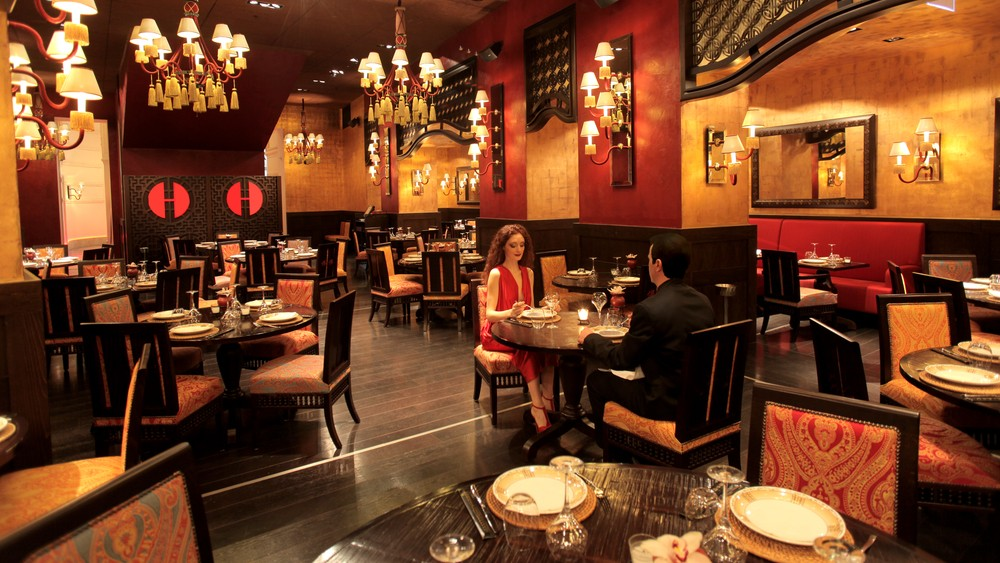

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [2]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt


Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [3]:
# PUT YOUR CODE HERE
df = pd.read_csv(" https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv")


### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()


,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

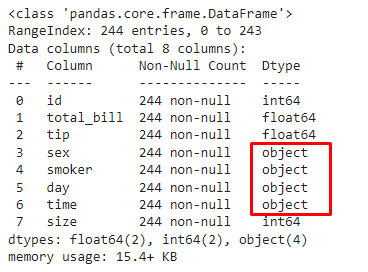

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

# manual convert df.['smocker'] = df.['smocker'].astype('string')


Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df= pd.DataFrame(df)
smokers_df = smokers_df[smokers_df.smoker == 'Yes']

# thầy làm : smokers_df = df[df['smoker']=='Yes']

#cách 2 : smokers_df = df.query("smoker == 'yes'")

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.head()


,id,total_bill,tip,sex,smoker,day,time,size
56,56,38.01,3.0,Male,Yes,Sat,Dinner,4
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,61,13.81,2.0,Male,Yes,Sat,Dinner,2
62,62,11.02,1.98,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df= pd.DataFrame(df)
non_smokers_df = non_smokers_df[non_smokers_df.smoker == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df.tip.min()
common_tip_max = df.tip.max()
common_tip_mean = df.tip.mean()
common_tip_median = df.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE

# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
df.head(1)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. **Insight 1**: The minimum tip is 1dola and the highest tip is 10 dola. The mean of tip is  2.998279 while it is 3.00871 dola for smokers and only 2.991854 for non-smokers which 5% lower compared with smocker

2. **Insight 2**: Base on table, smokers tends to tip higher and more than non-smoker



#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

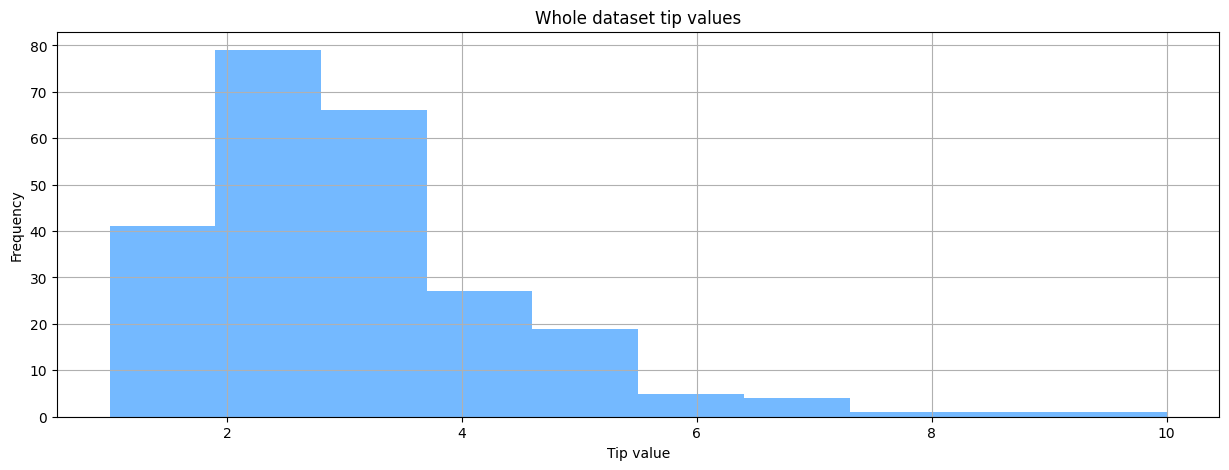

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, color = '#74b9ff')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

# Turning gridlines on
plt.grid(True)

plt.show()


##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

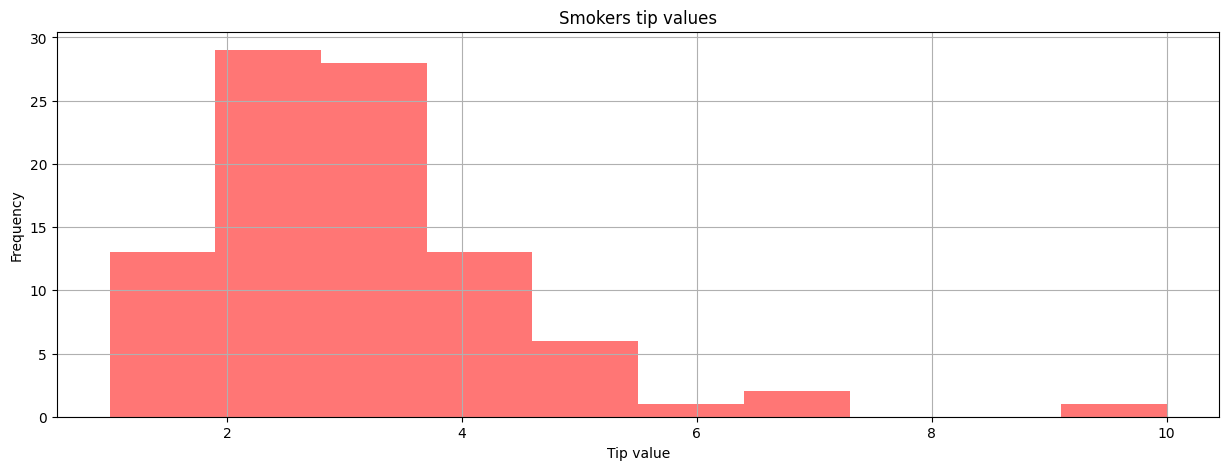

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df.tip, color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

# Turning gridlines on
plt.grid(True)

plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

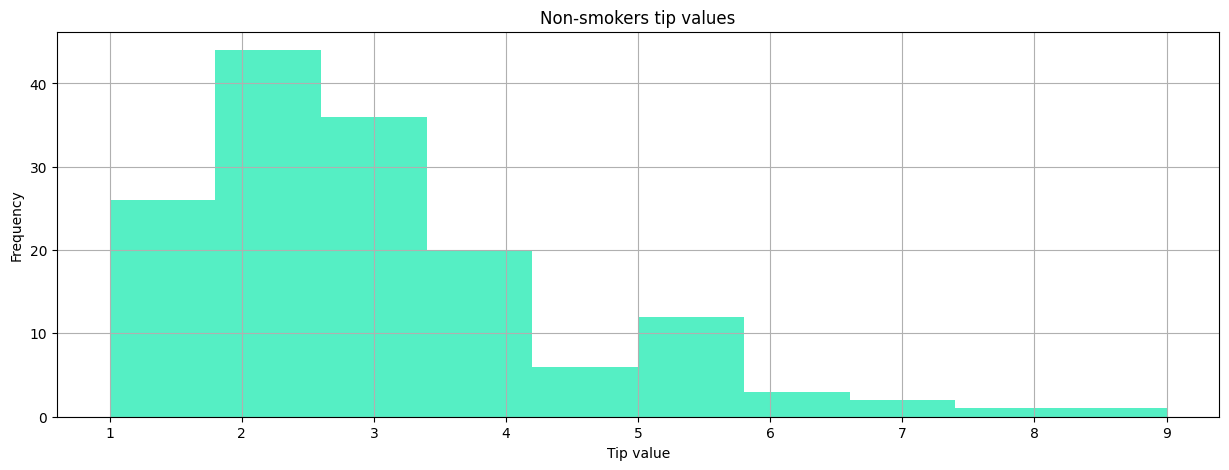

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df.tip, color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

# Turning gridlines on
plt.grid(True)

plt.show()


##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

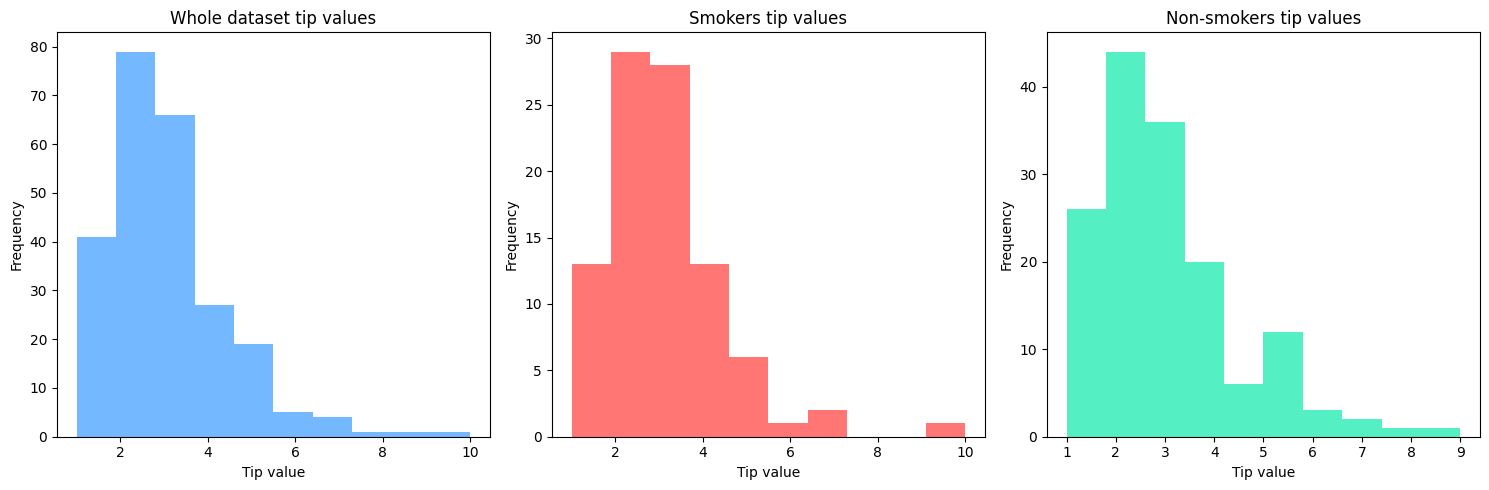

In [ ]:
# YOUR CODE
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df.tip, color = '#74b9ff')
axs[0].set_title('Whole dataset tip values')
axs[0].set_xlabel('Tip value')
axs[0].set_ylabel('Frequency')

axs[1].hist(smokers_df.tip, color = '#ff7675')
axs[1].set_title('Smokers tip values')
axs[1].set_xlabel('Tip value')
axs[1].set_ylabel('Frequency')

axs[2].hist(non_smokers_df.tip, color = '#55efc4')
axs[2].set_title('Non-smokers tip values')
axs[2].set_xlabel('Tip value')
axs[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [ ]:
# function for Plot all charts in a row in the same cell:
def subplot_tip_dimension (input_dimension,color_value ):
  distinct_dimension_value = df[input_dimension].unique()
  unique_value_count = df[input_dimension].nunique()

  fig, axs = plt.subplots(1, unique_value_count + 1, figsize=(15, 5))

  axs[0].hist(df.tip, color=color_value)
  axs[0].set_title('Whole dataset tip values')
  axs[0].set_xlabel('Tip value')
  axs[0].set_ylabel('Frequency')


  for i, value in enumerate(distinct_dimension_value):

    value_df = df[df[input_dimension] == value]
    axs[i+1].hist(value_df.tip, color=color_value)
    axs[i+1].set_title(f'{value}')
    axs[i+1].set_xlabel('Tip value')
    axs[i+1].set_ylabel('Frequency')

  plt.tight_layout()
  return plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Majority tip is below 4 dola
2. no one is smocker group tip around 7-9 dola
3. Frequency of 2-3 dola tip of non-smoker higher than smoker
4. Mostly, the higher tips, the less frequecy of it
**General conclusion:**

In [ ]:
## making a function use for other dimensions
def compare_tip_dynamic_dimension (input_dimension, input_numeric_col):

  df_agg_detail = df.groupby(input_dimension).agg(tip_min = (input_numeric_col, 'min'),
                                                   tip_max = (input_numeric_col, 'max'),
                                                   tip_mean = (input_numeric_col, 'mean'),
                                                   tip_median = (input_numeric_col, 'median'))
  df_agg_detail = df_agg_detail.T
  df_agg_detail = df_agg_detail.reset_index()



  df_agg = df.agg(tip_min = (input_numeric_col, 'min'),
                  tip_max = (input_numeric_col, 'max'),
                  tip_mean = (input_numeric_col, 'mean'),
                  tip_median = (input_numeric_col, 'median'))
  df_agg.columns = ["common"]
  df_agg = df_agg.reset_index()

  df_compare = df_agg.merge(df_agg_detail, "inner", on = "index")
  return df_compare


### **👨👩 Do males give more tips?**

In [ ]:
df_tip_by_gender = compare_tip_dynamic_dimension (input_dimension ='sex',input_numeric_col = "tip")
df_tip_by_gender

,index,common,Female,Male
0,tip_min,1.000000,1.0,1.0
1,tip_max,10.000000,6.5,10.0
2,tip_mean,2.998279,2.833448,3.089618
3,tip_median,2.900000,2.75,3.0


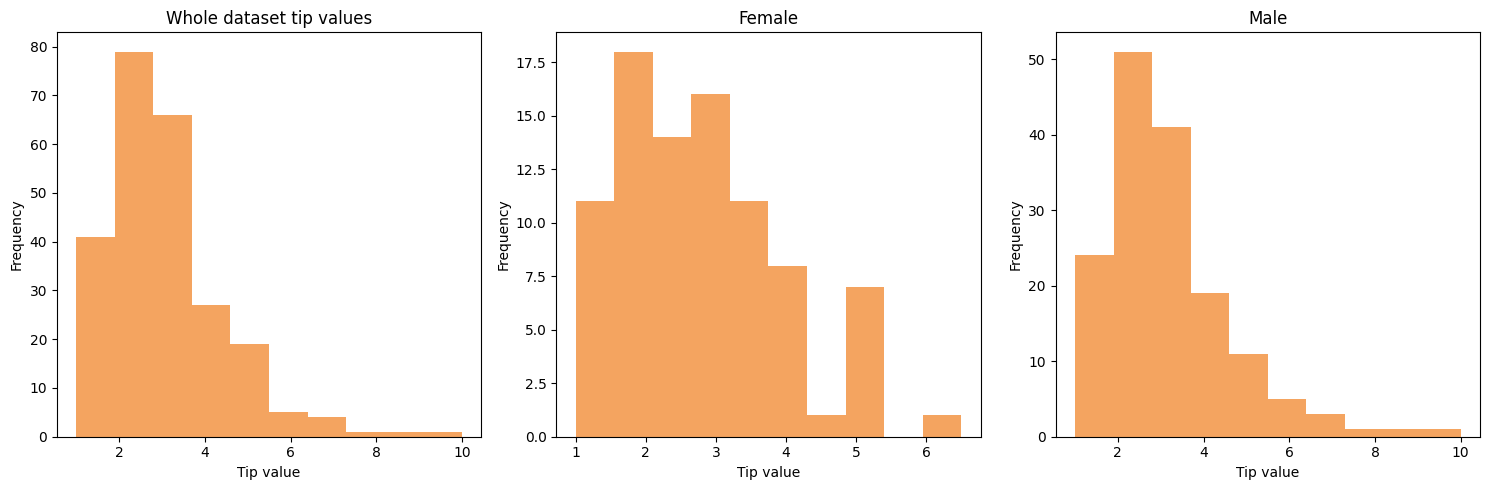

In [ ]:
df_subplot_by_gender = subplot_tip_dimension (input_dimension='sex',color_value='sandybrown' )
df_subplot_by_gender

Perform the same steps based on the column **sex**.

### **📆 Do weekends bring more tips?**

In [ ]:
df_tip_by_gender = compare_tip_dynamic_dimension (input_dimension ='day',input_numeric_col = "tip")
df_tip_by_gender

,index,common,Fri,Sat,Sun,Thur
0,tip_min,1.000000,1.0,1.0,1.01,1.25
1,tip_max,10.000000,4.73,10.0,6.5,6.7
2,tip_mean,2.998279,2.734737,2.993103,3.255132,2.771452
3,tip_median,2.900000,3.0,2.75,3.15,2.305


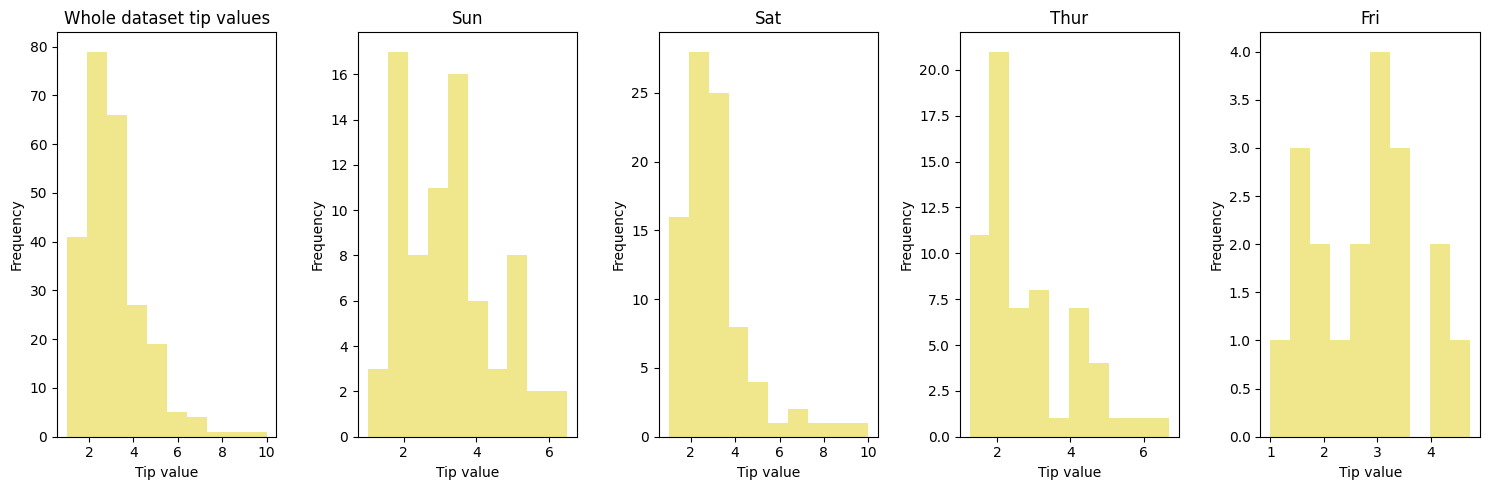

In [ ]:
df_subplot_by_gender = subplot_tip_dimension (input_dimension='day',color_value='khaki' )
df_subplot_by_gender

Perform the same steps based on the column **day**.

### **🕑 Do dinners bring more tips?**

In [ ]:
df_tip_by_gender = compare_tip_dynamic_dimension (input_dimension ='time',input_numeric_col = "tip")
df_tip_by_gender

,index,common,Dinner,Lunch
0,tip_min,1.000000,1.0,1.25
1,tip_max,10.000000,10.0,6.7
2,tip_mean,2.998279,3.10267,2.728088
3,tip_median,2.900000,3.0,2.25


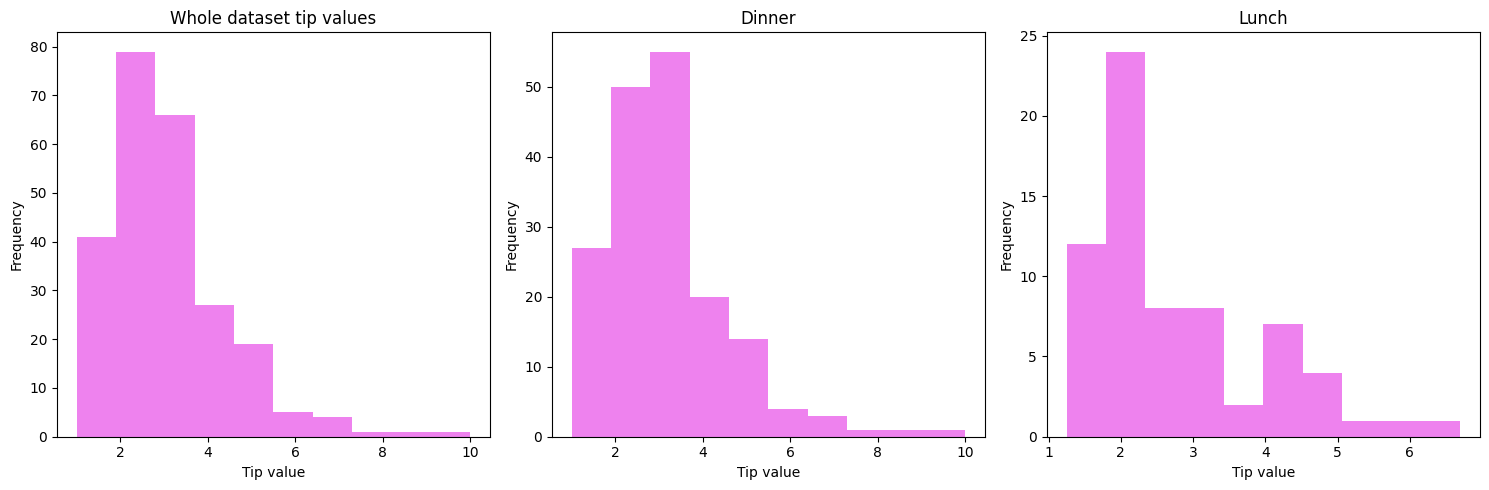

In [ ]:
df_subplot_by_gender = subplot_tip_dimension (input_dimension='time',color_value='violet' )
df_subplot_by_gender

Perform the same steps based on the column **time**.

In [4]:
conditions = [
    ("smoker", "No"),
    ("smoker", "Yes"),
    ("time", "Lunch"),
    ("time", "Dinner"),
    ("day", "Fri"),
    ("day", "Sat"),
    ("day", "Thur"),
    ("day", "Sun"),
]


rows = []

for col, val in conditions:

    female_count = df.query(f"sex == 'Female' and {col} == '{val}'").shape[0]
    male_count = df.query(f"sex == 'Male' and {col} == '{val}'").shape[0]
    condition_label = f"{col} = {val}"
    rows.append({
        "Điều kiện": condition_label,
        "Female": female_count,
        "Male": male_count    })


pivot_df = pd.DataFrame(rows)
print(pivot_df)

       Điều kiện  Female  Male
0    smoker = No      54    97
1   smoker = Yes      33    60
2   time = Lunch      35    33
3  time = Dinner      52   124
4      day = Fri       9    10
5      day = Sat      28    59
6     day = Thur      32    30
7      day = Sun      18    58


Insight
1. Male tends to tip higher than women (8% higher). the highest of man's tip is 10$ while it is  6.5 dola for female. The lowest amount for man below 1dola but women never tip under 1 dola
2. For both man and women, they usually tip around from 2-4 dola
3. Only few women tip over 5dola but no one tip around 5.5 to below 6 dola
4. From 4-10 dola, the number of man tips at this amount reduce significantly compare with range 1-4 dola
5. Sat has more people tip higher than other day. the highest tip is 10 dola and it happened only Saturday while other day such as friday the highest tip is around 5 dola, and sunday and thurday are over 6 dola. However, average tip on sunday is highest which is 3.255 dola meanwhile, others is below 3 dola. The lowest is on friday with average is 2.73 dola
6. On thur, the min tip is 1.25 dola while other day min tip around 1 dola
7. Customer tends to go to restaurant on sat (the highest number of customer) and it could be the reason for the chance to receive the tip max compared with other days.
8. People tip higher in dinner time (average tip is 12% higher than luch)which has highest tip is 10 dola while in lunch, the highest tip is over 6 dola. However,in luch,  nobody tipped under 1 dola, the lowest is  1.25 dola.
9. in dinner, men arrived restaurant more than a half of women and number of people eat in dinner is 2.5 higher than lunch, it maybe affect to the tip amount (in dinner, tip is higher)
